In [2]:
import torch
import cupy as cp
import numpy as np
from cupyx.scipy.sparse.linalg import svds, LinearOperator
import numba
from numba import jit
from numba import cuda

import matplotlib.pyplot as plt

In [3]:
def is_pos_def(x):
    return np.all(np.linalg.eigvals(x) > 0)


In [4]:
torch.manual_seed(42)

In [ ]:
/home/jovyan/shares/SR004.nfs2/chekalina/FisherKronecker/small_nn/v4_tensor_grad.pickle

In [1]:
!pwd

/home/jovyan/shares/SR004.nfs2/chekalina/FisherKronecker/bert_cola


In [6]:
import pickle
with open(r"/home/jovyan/shares/SR004.nfs2/chekalina/FisherKronecker/small_nn/v3_tensor_grad.pickle", "rb") as input_file:
    dct = pickle.load(input_file)

In [7]:
dct.keys()

dict_keys(['bert.encoder.layer.5.intermediate.dense', 'bert.encoder.layer.5.output.dense', 'bert.encoder.layer.11.intermediate.dense', 'bert.encoder.layer.11.output.dense'])

## 5th module BERT, intermediate dense

In [5]:
weights_5 = torch.load("v2_tensor_weight_l5.pt")
grads_5 = torch.load("v2_tensor_grad_l5.pt")

tensor([12.0854,  5.5631,  5.3730,  5.1938,  4.9412,  4.9069,  4.8570,  4.7447,
         4.7003,  4.5739])


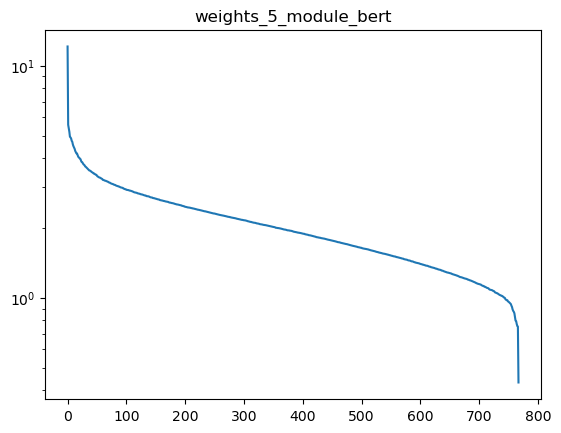

In [8]:
U, S, VH = torch.linalg.svd(weights_5)
print (S[:10])
plt.plot(S.cpu().numpy())
plt.yscale('log')
plt.title("weights_5_module_bert")
plt.show()

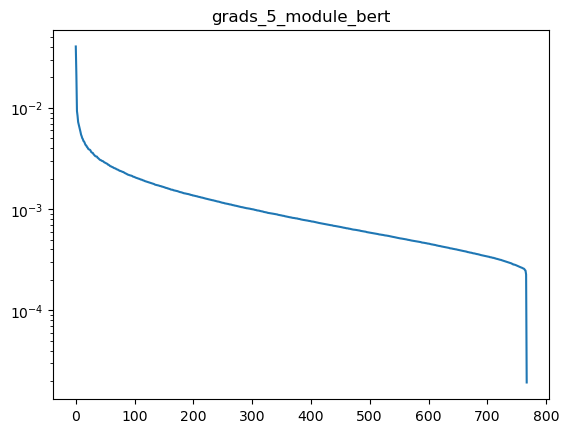

In [9]:
U, S, VH = torch.linalg.svd(grads_5)
plt.plot(S.cpu().numpy())
plt.yscale('log')
plt.title("grads_5_module_bert")
plt.show()

In [5]:
S[:10]

tensor([0.0405, 0.0212, 0.0093, 0.0084, 0.0073, 0.0069, 0.0065, 0.0061, 0.0058,
        0.0054])

In [4]:
B1 = np.load("C1_101.npy")
C1 = np.load("B1_101.npy")
s = np.load("s1.npy")
print (s)

[0.0016368  0.00085579 0.00085579]


In [5]:
is_pos_def(B1)

False

In [8]:
is_pos_def(C1)

False

In [7]:
is_pos_def((B1 + B1.T)/2)

False

## 11th module BERT, intermediate dense

In [11]:
weights_11 = torch.load("v2_tensor_weight.pt")
grads_11 = torch.load("v2_tensor_grad.pt")

tensor([9.3200, 5.3858, 5.1964, 4.9099, 4.7438, 4.7014, 4.5575, 4.5109, 4.4319,
        4.3778])


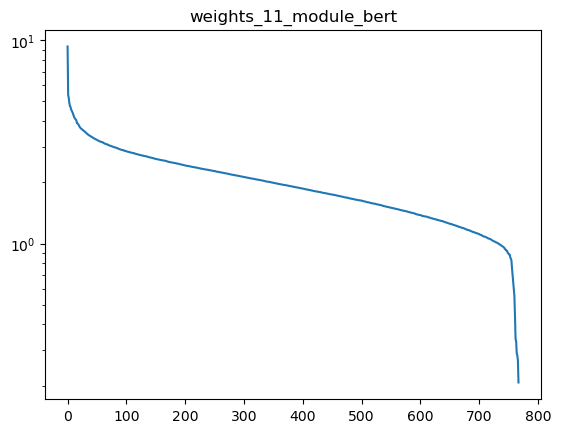

In [12]:
U, S, VH = torch.linalg.svd(weights_11)
print (S[:10])
plt.plot(S.cpu().numpy())
plt.yscale('log')
plt.title("weights_11_module_bert")
plt.show()

tensor([9.3200, 5.3858, 5.1964, 4.9099, 4.7438, 4.7014, 4.5575, 4.5109, 4.4319,
        4.3778])


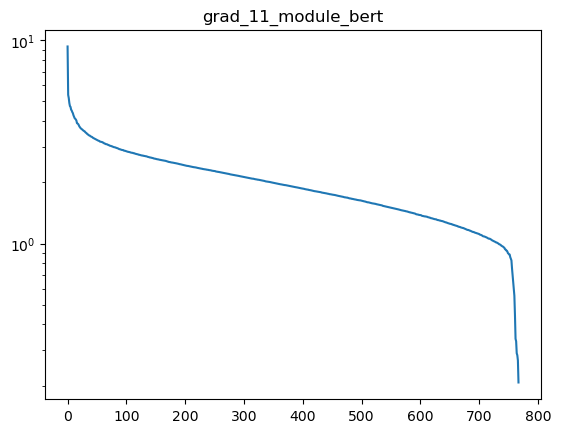

In [13]:
U, S, VH = torch.linalg.svd(weights_11)
print (S[:10])
plt.plot(S.cpu().numpy())
plt.yscale('log')
plt.title("grad_11_module_bert")
plt.show()

In [9]:
B1 = np.load("C1_10.npy")
C1 = np.load("B1_10.npy")
s = np.load("s.npy")
print (s)

[0.00369837 0.00094176 0.00082839]


In [1]:
!pwd

/home/jovyan/shares/SR004.nfs2/chekalina/FisherKronecker
